## Integrated Project: Understanding Maji Ndogo's agriculture

# Introduction

Hey there, I'm glad you're on board for the Maji Ndogo project AGAIN! Let me walk you through what we're up against and how we'll tackle it.

As you know, we're in an ambitious project aimed at automating farming in Maji Ndogo, a place with diverse and challenging agricultural landscapes. Before we dive into the 'how' of farming, we need to figure out the 'where' and 'what'. It's not just about deploying technology; it's about making informed decisions on where to plant specific crops, considering factors like rainfall, soil type, climate, and many others.

Our analysis is the groundwork for this entire automation project. We have an array of variables like soil fertility, climate conditions, and geographical data. By understanding these elements, we can recommend the best locations for different crops. It's a bit like solving a complex puzzle – each piece of data is crucial to seeing the bigger picture.

We'll start by importing our dataset into a DataFrame. It is currently in an SQLite database, and split into tables. Unlike Power BI or SQL, data analysis in Python happens in a single table. So we will have to brush off those dusty SQL skills to get the data imported. Expect a bit of a mess in the data – it's part of the challenge. We need to clean it up and maybe reshape it to make sense of it. It's like sorting out the tools and materials we need and getting rid of what we don't.

Here's where the real fun begins. We'll dive deep into the data, looking for patterns, and correlations. Each clue in the data leads us closer to understanding the best farming practices for Maji Ndogo. I'll be relying on your skills and insights. We'll be working through these steps together, discussing our findings and strategies.

Let's gear up and get ready to make a real difference in Maji Ndogo. Ready to get started? Let's dive into our data and see what stories it has to tell us.

# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float).

- **Longitude:** Geographical longitude of the field in degrees (Float).

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float).

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield

- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

**Average yield (tons/Ha) per crop type:**
- **Coffee:** 1.5 

- **Wheat:** 3

- **Rice:** 4.5

- **Maize:** 5.5

- **Tea:** 1.2

- **Potato:** 20

- **Banana:** 30

- **Cassava:** 13



Alright, let's walk through the process of importing our SQL data from multiple tables into a single DataFrame. This is a crucial step as it sets the foundation for all our subsequent analyses.

We're dealing with an SQLite database, Maji_Ndogo_farm_survey.db, which contains multiple tables. We'll need to join these tables on a common key to create a comprehensive dataset for our analysis. The common key in our case is `Field_ID`.

Here’s how we can do it:

In [2]:
import pandas as pd # importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.

# Create an engine for the database
engine = create_engine('sqlite:///Maji_Ndogo_farm_survey_small.db') #Make sure to have the .db file in the same directory as this notebook, and the file name matches.

Next up, we test if the connection works by printing out all of the table names in the database.

In [3]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print(row)

('geographic_features',)
('weather_features',)
('soil_and_crop_features',)
('farm_management_features',)


**Expected output:**

`('geographic_features',)`

`('weather_features',)`

`('soil_and_crop_features',)`

`('farm_management_features',)`

At this point, we have two choices:

1. Either we import each table into a DataFrame, for example, `df_geographic`, then merge them together.

2. Use one SQL query and read it into a single DataFrame.

While both are equally viable, let's try to use a single SQL query to keep things simple.

Next, we'll write an SQL query to join our tables. Combine all of the tables into a single query, using `Field_ID`.

In [4]:
sql_query = """
SELECT *
FROM geographic_features
JOIN weather_features ON geographic_features.Field_ID = weather_features.Field_ID
JOIN soil_and_crop_features ON geographic_features.Field_ID = soil_and_crop_features.Field_ID
JOIN farm_management_features ON geographic_features.Field_ID = farm_management_features.Field_ID
"""

With our engine and query ready, we'll use `Pandas` to execute the query. The `pd.read_sql_query` function fetches the data and loads it into a DataFrame – essentially transferring our data from the database into a familiar `Pandas` structure. If you use one query, you will import it all into `MD_agric_df`. 

In [5]:
# Create a connection object
with engine.connect() as connection:
    
    # Use Pandas to execute the query and store the result in a DataFrame
    MD_agric_df = pd.read_sql_query(text(sql_query), connection)

Check the DataFrame to see if it loaded correctly.

In [6]:
MD_agric_df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,30629,1450.7,-3.9,30.6,...,30629,0.64,Volcanic,5.676648,30629,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,39924,2208.9,-1.8,28.4,...,39924,0.69,Volcanic,5.331993,39924,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,11472,885.7,-4.3,33.4,...,11472,0.61,Sandy,5.741063,11472,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,19660,501.1,-4.8,32.1,...,19660,0.54,Sandy,5.445833,19660,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,41296,1586.6,-3.8,33.4,...,41296,0.64,Volcanic,5.385873,41296,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,33090,1272.2,-6.2,34.6,...,33090,0.63,Silt,5.562508,33090,6.917245e-10,1.3,0.659874,cassava,0.507595


In [7]:
# Now, drop all columns named 'Field_ID'.
MD_agric_df.drop(columns = 'Field_ID', inplace = True)

# Data cleanup

I noticed some errors in the data. Here's what I picked up:

1. There are some swapped column names.

2. Some of the crop types contain spelling errors.

3.  The `Elevation` column contains some negative values, which are not plausible, so change these to positive values.

Use your Pandas skills to clean up the data.

In [8]:
# Answer (REMOVE)
MD_agric_df.rename(columns={'Annual_yield': 'Crop_type_Temp', 'Crop_type': 'Annual_yield'}, inplace=True)
MD_agric_df.rename(columns={'Crop_type_Temp': 'Crop_type'}, inplace=True)
MD_agric_df['Elevation'] = MD_agric_df['Elevation'].abs()

# Correcting 'Crop_type' column
def correct_crop_type(crop):
    crop = crop.strip()  # Remove trailing spaces
    corrections = {
        'cassaval': 'cassava',
        'wheatn': 'wheat',
        'teaa': 'tea'
    }
    return corrections.get(crop, crop)  # Get the corrected crop type, or return the original if not in corrections

# Apply the correction function to the Crop_type column
MD_agric_df['Crop_type'] = MD_agric_df['Crop_type'].apply(correct_crop_type)

## Final data checkup

Compare your answers to the expected output to make sure your data is corrected.

In [9]:
len(MD_agric_df['Crop_type'].unique())

8

In [10]:
MD_agric_df['Elevation'].min()

np.float64(35.910797)

In [11]:
MD_agric_df['Annual_yield'].dtype

dtype('float64')

# Analysis

## Challenge 1: Uncovering crop preferences

Now that we have our data ready, let's delve into understanding where different crops are grown in Maji Ndogo. Our initial step is to focus on tea, a key crop in Maji Ndogo. We need to determine the optimal conditions for its growth. By analyzing data related to elevation, rainfall, and soil type specifically for tea plantations, we'll start to paint a picture of where our farming systems could thrive.

**Task:**
Create a function that includes only tea fields and returns a tuple with the mean `Rainfall` and the mean `Elevation`. The function should input the full DataFrame, a string value for the crop type to filter by, and output a tuple with rainfall and elevation.


In [12]:
### START FUNCTION
def explore_crop_distribution(df,crop_filter):
    filtered_df = df[df['Crop_type']== crop_filter]
    return (filtered_df['Rainfall'].mean(),filtered_df['Elevation'].mean())
### END FUNCTION

Input:

In [13]:
explore_crop_distribution(MD_agric_df, "tea")

(np.float64(1534.5079956188388), np.float64(775.208667535597))

In [14]:
explore_crop_distribution(MD_agric_df, "wheat")

(np.float64(1010.2859910581222), np.float64(595.8384148002981))

## Challenge 2: Finding fertile grounds


With insights into tea cultivation, let's broaden our horizons. Fertile soil is the bedrock of successful farming. By grouping our data by location and soil type, we'll pinpoint where the most fertile soils in Maji Ndogo are. These fertile zones could be prime candidates for diverse crop cultivation, maximising our yield.

We’ll group our data by soil type to see where the most fertile grounds are. This information will be vital for deciding where to deploy our farming technology.

**Task:** Create a function that groups the data by `Soil_type`, and returns the `Soil_fertility`.

In [15]:
### START FUNCTION
def analyse_soil_fertility(df):
    return df.groupby(['Soil_type'])['Soil_fertility'].mean()
### END FUNCTION

Input:

In [16]:
analyse_soil_fertility(MD_agric_df)

Soil_type
Loamy       0.585868
Peaty       0.604882
Rocky       0.582368
Sandy       0.595669
Silt        0.652654
Volcanic    0.648894
Name: Soil_fertility, dtype: float64

Try digging into the data a bit more by aggregating various data to identify some more patterns. 

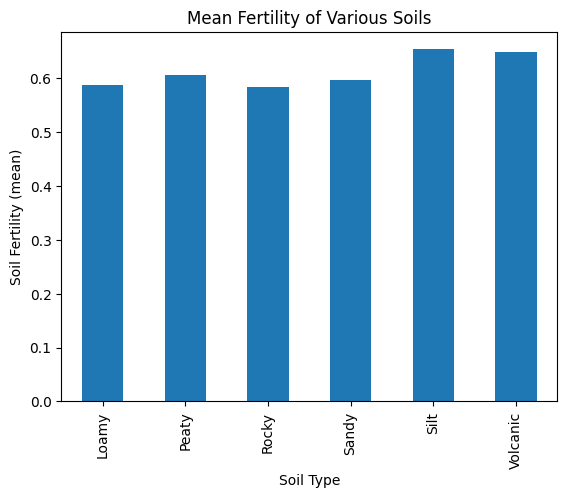

In [21]:
analyse_soil_fertility(MD_agric_df).plot(kind="bar", xlabel= "Soil Type", ylabel= "Soil Fertility (mean)", title= "Mean Fertility of Various Soils");

## Challenge 3: Climate and geography analysis

Now, let's delve into how climate and geography influence farming. By understanding the relationship between factors like elevation, temperature, and rainfall with crop yields, we can identify the most suitable areas for different crops. This analysis is key to ensuring our automated systems are deployed in locations that will maximise their effectiveness.

**Task:** Create a function that takes in a DataFrame and the column name, and groups the data by that column, and aggregates the data by the means of `Elevation`, `Min_temperature_C`, `Max_temperature_C`, and `Rainfall`, and outputs a DataFrame. Please ensure that the order of the columns matches the output.

In [22]:
### START FUNCTION
def climate_geography_influence(df,column):
    return df.groupby([column]).agg({'Elevation': 'mean', 'Min_temperature_C': 'mean', 'Max_temperature_C': 'mean', 'Rainfall': 'mean'})
### END FUNCTION

Input:

In [23]:
climate_geography_influence(MD_agric_df, 'Crop_type')

,Elevation,Min_temperature_C,Max_temperature_C,Rainfall
Crop_type,,,,
banana,487.973572,-5.354344,31.988152,1659.905687
cassava,682.903008,-3.992113,30.902381,1210.543006
coffee,647.047734,-4.028007,30.855189,1527.265074
maize,680.596982,-4.497995,30.576692,681.010276
potato,696.313917,-4.375334,30.300608,660.289064
rice,352.858053,-6.610566,32.727170,1632.382642
tea,775.208668,-2.862651,29.950383,1534.507996
wheat,595.838415,-4.968107,30.973845,1010.285991


## Challenge 4: Advanced sorting techniques

Quite often it is better to improve the things you're good at than improving the things you're bad at. So the question is, which crop is the top performer in Maji Ndogo, and under what conditions does it perform well? 

To answer this, we need to:
1. Filter all the fields with an above-average `Standard_yield` (do you have flashbacks to SQL subqueries right now?).
2. Then group by <?> crop type, using `count()`.
3. Sort the values to get the top crop type on top.
4. Retrieve the name of the top index. See the hint below on how to do this. 

**Task:** Create a function that takes a DataFrame as input, filters, groups and sorts, and outputs a string value of a crop type.

**Hint:** When you have grouped by a column, we can access the labels of that "index column" using `.index`. For example: 

In [24]:
grouped_df = MD_agric_df.groupby("Soil_type").mean(numeric_only = True).sort_values(by="Elevation",ascending=False)
print(grouped_df.index[0])
grouped_df

Rocky


,Elevation,Latitude,Longitude,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,pH,Pollution_level,Plot_size,Annual_yield,Standard_yield
Soil_type,,,,,,,,,,,,,,
Rocky,892.665740,-4.115932,-4.774825,8.631688,841.874671,-2.425658,29.131579,13.352961,0.582368,5.239680,0.235317,4.431250,2.197934,0.497657
Volcanic,750.902092,-7.471007,-1.977809,10.883989,1630.504364,-2.993755,30.089992,13.548119,0.648894,4.915182,0.238390,4.228518,2.518344,0.596921
Sandy,743.456509,-4.886504,-4.993451,13.902178,797.665003,-3.821689,30.175496,13.176903,0.595669,5.652828,0.295577,3.527191,1.770793,0.504614
Loamy,552.383554,-4.577196,-3.715553,12.559178,724.785612,-5.620966,31.374717,12.876876,0.585868,5.670844,0.320841,3.567009,2.084702,0.579886
Peaty,467.291922,-10.635362,-5.611269,3.850355,1344.381176,-5.835294,32.032941,13.098824,0.604882,4.945214,0.088177,7.205294,3.265347,0.448361
Silt,424.196238,-11.138730,-6.258565,11.179052,1667.228365,-5.927452,32.306236,13.189392,0.652654,6.375260,0.064196,3.810418,1.865240,0.492600


In [25]:
### START FUNCTION
def find_ideal_fields(df):
    mean_yield = df['Standard_yield'].mean()
    filtered_df = df[(df['Standard_yield'] > mean_yield)]
    return filtered_df.groupby("Crop_type").count().sort_values(by="Standard_yield", ascending = False).index[0]
### END FUNCTION

Input:

In [26]:
type(find_ideal_fields(MD_agric_df))

str

Expected output: `str`

# Challenge 5: Advanced filtering techniques

Now we know that <?> is our most successful crop, we can look at what makes it successful.

Create a function that takes a DataFrame as input, and the type of crop, and filters the DataFrame using the following conditions:
1. Filter by crop type.

2. Select only rows that have above average `Standard_yield`.

3. Select only rows that have `Ave_temps` >= 12 but =< 15.

4. Have a `Pollution_level` lower than 0.0001.

In [27]:
### START FUNCTION
def find_good_conditions(df, crop_type):
    filtered_df = df[(df['Crop_type']== crop_type) 
                & (df['Standard_yield'] > df['Standard_yield'].mean()) 
                & (df['Ave_temps'].between(12,15)) 
                & (df['Pollution_level'] < 0.0001)]
    return filtered_df
### END FUNCTION

Input:

In [28]:
find_good_conditions(MD_agric_df, "tea").shape

(14, 17)

Expected Outcome: `(14, 17)`

# Extra Pandas "nuggets"

We have not even scratched the surface of Pandas or our dataset. If you remember back to your days with Chidi, it took a while before we could unlock the secrets the survey data had. So, scratch around a bit.

On the Pandas front, it's the same. Pandas is a very powerful data analysis tool that takes a while to master. Many of the more advanced methods like window functions, dynamically retrieving or changing data, vectorisation, or processing big data with Pandas are all more advanced topics we encounter in the workplace.

But here are two tiny 'nuggets' to upskill in Pandas.

## df.query()

Oh, you're going to love this one... `df.query()` was designed to filter data, but using SQL-like syntax. For example:

In [29]:
MD_agric_df.query('Standard_yield > 0.5 and Soil_type == "Loamy"')

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
3,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,0.286687,2.4,1.277635,cassava,0.532348
19,610.99400,-6.948353,-2.966000,Rural_Hawassa,16.369598,902.8,-4.9,28.4,11.75,0.61,Loamy,4.698949,0.303487,1.5,0.791114,wheat,0.527409
22,504.42505,-2.379580,-7.601249,Rural_Kilimani,3.906222,335.3,-6.4,32.6,13.10,0.53,Loamy,5.429212,0.057291,7.1,4.256354,wheat,0.599486
26,525.38104,-2.465188,-5.186775,Rural_Kilimani,6.809244,298.6,-6.3,33.8,13.75,0.54,Loamy,6.453105,0.192563,4.8,2.603143,potato,0.542321
44,562.14720,-7.953123,-2.222739,Rural_Sokoto,24.619905,1200.3,-5.3,31.8,13.25,0.66,Loamy,4.649274,0.262477,1.4,0.948407,tea,0.677433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,636.75790,-7.322326,-5.128215,Rural_Hawassa,17.667543,812.0,-4.8,30.6,12.90,0.61,Loamy,4.882120,0.193366,0.8,0.442964,cassava,0.553705
5621,509.44156,-6.614932,-1.641644,Rural_Sokoto,19.441830,958.9,-5.8,31.5,12.85,0.62,Loamy,5.485380,0.800948,1.7,0.943078,cassava,0.554751
5625,614.65955,-6.948353,-3.029065,Rural_Hawassa,2.801264,896.6,-4.9,28.5,11.80,0.57,Loamy,4.809189,0.288357,5.3,3.053344,potato,0.576103
5632,618.01624,-6.511301,-2.574099,Rural_Hawassa,19.183754,888.0,-4.9,26.9,11.00,0.62,Loamy,5.231630,0.499646,0.7,0.350604,wheat,0.500862


Isn't that much easier to read and understand than the one below?

In [30]:
MD_agric_df[(MD_agric_df['Standard_yield'] > 0.5) & (MD_agric_df['Soil_type'] == 'Loamy')]

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
3,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,0.286687,2.4,1.277635,cassava,0.532348
19,610.99400,-6.948353,-2.966000,Rural_Hawassa,16.369598,902.8,-4.9,28.4,11.75,0.61,Loamy,4.698949,0.303487,1.5,0.791114,wheat,0.527409
22,504.42505,-2.379580,-7.601249,Rural_Kilimani,3.906222,335.3,-6.4,32.6,13.10,0.53,Loamy,5.429212,0.057291,7.1,4.256354,wheat,0.599486
26,525.38104,-2.465188,-5.186775,Rural_Kilimani,6.809244,298.6,-6.3,33.8,13.75,0.54,Loamy,6.453105,0.192563,4.8,2.603143,potato,0.542321
44,562.14720,-7.953123,-2.222739,Rural_Sokoto,24.619905,1200.3,-5.3,31.8,13.25,0.66,Loamy,4.649274,0.262477,1.4,0.948407,tea,0.677433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,636.75790,-7.322326,-5.128215,Rural_Hawassa,17.667543,812.0,-4.8,30.6,12.90,0.61,Loamy,4.882120,0.193366,0.8,0.442964,cassava,0.553705
5621,509.44156,-6.614932,-1.641644,Rural_Sokoto,19.441830,958.9,-5.8,31.5,12.85,0.62,Loamy,5.485380,0.800948,1.7,0.943078,cassava,0.554751
5625,614.65955,-6.948353,-3.029065,Rural_Hawassa,2.801264,896.6,-4.9,28.5,11.80,0.57,Loamy,4.809189,0.288357,5.3,3.053344,potato,0.576103
5632,618.01624,-6.511301,-2.574099,Rural_Hawassa,19.183754,888.0,-4.9,26.9,11.00,0.62,Loamy,5.231630,0.499646,0.7,0.350604,wheat,0.500862


The nice thing is, we can use `in []`, `not in []` to filter with, and also pass in variables using `@variable_name`.

In [31]:
soil_types = ['Loamy', 'Sandy', 'Silt']

MD_agric_df.query('Soil_type in @soil_types')

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
3,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
5,850.56647,-2.050665,-7.132769,Rural_Kilimani,50.451250,649.4,-3.0,29.5,13.25,0.70,Sandy,5.484350,1.275280e-01,1.7,1.112611,potato,0.654477
6,331.35538,-13.409517,-6.722849,Rural_Hawassa,5.907423,1586.0,-6.8,31.8,12.50,0.63,Silt,7.061317,4.315457e-07,2.9,0.994325,banana,0.342871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,748.03925,-2.284961,-3.204745,Rural_Kilimani,3.848560,850.5,-3.7,30.7,13.50,0.57,Sandy,5.534095,2.333130e-01,10.0,5.938548,potato,0.593855
5649,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5652,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


# Plotting data with Pandas

Sometimes we quickly want to see a basic visualisation of our data. we can use `df.plot(kind='bar')` to make a bar plot, `df.plot(kind='hist', bins = 10)` to see the distribution of a data column, or `df.plot(kind='scatter', x='Column_on_x', y='Column_on_y')` to understand the relationship between variables.

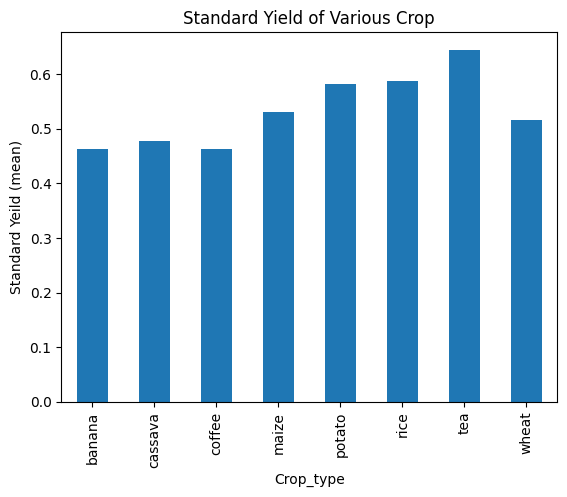

In [43]:
MD_agric_df.groupby('Crop_type')['Standard_yield'].mean().plot(kind='bar', ylabel= "Standard Yeild (mean)", title="Standard Yield of Various Crop");

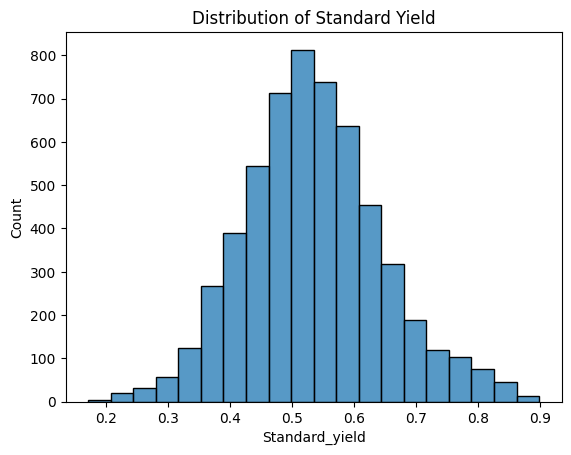

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# MD_agric_df['Standard_yield'].plot(kind='hist', bins =20)
sns.histplot(x = MD_agric_df['Standard_yield'], bins= 20)
plt.title("Distribution of Standard Yield");

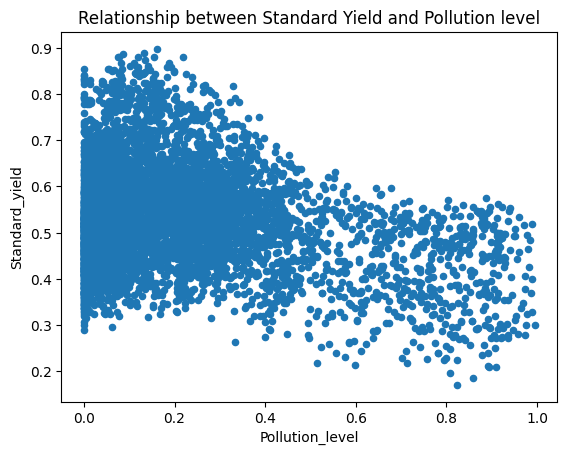

In [42]:
MD_agric_df.plot(kind='scatter', x = "Pollution_level", y = "Standard_yield", title= "Relationship between Standard Yield and Pollution level" );

We can use these plots to get a quick feel for the data, but we can't really customise these much. For that we need some better tools. 

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>